### Objective: Predict future repayment behavior or business success.

 From our dataset, we don’t have explicit repayment data, so we can’t directly model repayment behavior (e.g. whether a loan was paid back). However, we can model loan eligibility or likelihood to receive credit, which is a strong proxy in credit scoring when repayment data is missing. We will use this as a proxy for future repayment behavior. We want to establish creditworthiness signals based on:

**Farm productivity**

**Asset ownership**

**Financial behavior**

**Demographics**

In [62]:
# Imporing necessary libraries and exploring the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# I'll load the dataset (locally), remove duplicates, and drop columns with all missing values
data1 = pd.read_csv(r"c:\Users\USER\Downloads\agric_connect_summit_hackathon_2018_2019_dataset.csv")\
    .drop_duplicates()\
    .dropna(how="all", axis=1)

# I'll then create a copy of the dataset (data) to work with, keeping the original data intact
data = data1.copy()

data.head()

,zone,gender,age,year_of_birth,indiv-hhid,sector,education,marital status,year_plot_acquired,legal_title_certificate,...,price_paid_for_crop_seed,financed_purchase_cropseed,bank_account,insurance,borrowed/loan,lender type,reason_for_loan,owned_non_agric_business,owned_trading_business,year_plot_acquired (groups)
0,north east,male,42,1976,420005,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
1,north east,female,32,1989,520005,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
2,north east,male,31,1988,620044,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
3,north east,male,69,1950,120050,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
4,north east,female,64,1955,220050,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11564 entries, 0 to 11563
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zone                         11564 non-null  object 
 1   gender                       11564 non-null  object 
 2   age                          11564 non-null  int64  
 3   year_of_birth                11564 non-null  int64  
 4   indiv-hhid                   11564 non-null  int64  
 5   sector                       11403 non-null  object 
 6   education                    11403 non-null  object 
 7   marital status               11403 non-null  object 
 8   year_plot_acquired           1950 non-null   float64
 9   legal_title_certificate      1950 non-null   object 
 10  legal_title_right0fO         1950 non-null   object 
 11  legal_title_customary        1950 non-null   object 
 12  legal_title_deed             1950 non-null   object 
 13  current_price_of

In [64]:
data.describe()

,age,year_of_birth,indiv-hhid,year_plot_acquired,current_price_of_plot,planted_crop(quantity),planted_crop(unit),harvested_crop(quantity),harvested_crop(unit),harvested_crop_sold,value_harvested_sold,harvested_crop_lost,price_paid_for_crop_seed
count,11564.000000,11564.000000,1.156400e+04,1950.000000,1.950000e+03,7808.000000,7808.000000,7706.000000,7706.000000,7435.000000,7.435000e+03,7435.000000,7844.00000
mean,38.433068,1979.215150,2.463426e+06,2792.810256,4.603820e+06,766.269211,73.047387,42.582312,94.906826,9.688763,2.131003e+04,0.057886,1470.67899
std,16.041267,16.094062,2.615151e+06,2389.000261,2.170488e+07,18529.745333,66.634859,352.875976,60.955484,72.196896,7.132757e+04,1.251631,6866.24215
min,18.000000,1887.000000,1.100010e+05,1950.000000,3.500000e+02,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,25.000000,1968.000000,1.129006e+06,1996.000000,3.000000e+05,3.000000,30.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
50%,35.000000,1982.000000,1.544610e+06,2007.000000,1.000000e+06,5.000000,50.000000,4.000000,130.000000,0.000000,0.000000e+00,0.000000,0.00000
75%,50.000000,1993.000000,3.169108e+06,2014.000000,3.000000e+06,15.000000,100.000000,10.000000,130.000000,4.000000,2.000000e+04,0.000000,600.00000
max,130.000000,2014.000000,2.920019e+07,9999.000000,5.000000e+08,700000.000000,900.000000,8000.000000,211.000000,2000.000000,2.604000e+06,50.000000,240000.00000


rop

In [65]:
# Our target column contains binary variables indicating whether the farmer has borrowed/loaned money or not.
data['borrowed/loan'].unique()

array(['no', 'yes'], dtype=object)

In [66]:
def inspect_column(df, column_name):
    """ Function to inspect a specific column in the DataFrame."""
    print(f"\n📌 Column: {column_name}")
    print("-" * 30)
    print("Unique values:", df[column_name].unique())
    print("Value counts:\n", df[column_name].value_counts(dropna=False))
    print("Missing values:", df[column_name].isna().sum())

    # Check for potential "strange" entries (e.g., extra whitespace, case variations)
    if df[column_name].dtype == "object":
        cleaned = df[column_name].str.strip().str.lower()
        print("\nNormalized unique values:", cleaned.unique())
        print("Normalized value counts:\n", cleaned.value_counts(dropna=False))


In [67]:
# First column is "borrowed/loan". This is our target column and a metric for credit access.
inspect_column(data, 'borrowed/loan')


📌 Column: borrowed/loan
------------------------------
Unique values: ['no' 'yes']
Value counts:
 borrowed/loan
no     9748
yes    1816
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['no' 'yes']
Normalized value counts:
 borrowed/loan
no     9748
yes    1816
Name: count, dtype: int64


In [68]:
# The column is clean, binary (yes/no), and fully populated. Next is "gender" column 

inspect_column(data, 'gender')



📌 Column: gender
------------------------------
Unique values: ['male' 'female']
Value counts:
 gender
female    6058
male      5506
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['male' 'female']
Normalized value counts:
 gender
female    6058
male      5506
Name: count, dtype: int64


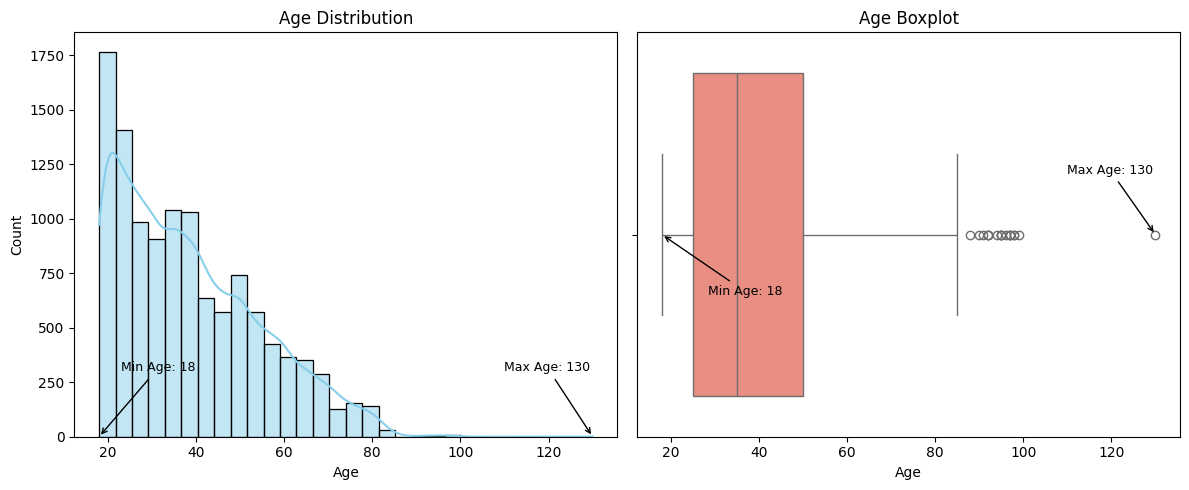

In [69]:
# The "gender" column is fine. Next is the "age" column

# Checking distribution of age
plt.figure(figsize=(12, 5))

min_age = data['age'].min()
max_age = data['age'].max()

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Annotate min and max on histogram 
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 5, 300),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, 300),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'], color='salmon')
plt.title('Age Boxplot')
plt.xlabel('Age')

# Annotate min and max on boxplot (min moved 75% more to the right)
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 10.5, 0.15),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, -0.15),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

plt.tight_layout()
plt.show()


### The "age" column contains some outliers. We can restrict the age range to 90 and below, since most people cannot actively farm at that age.


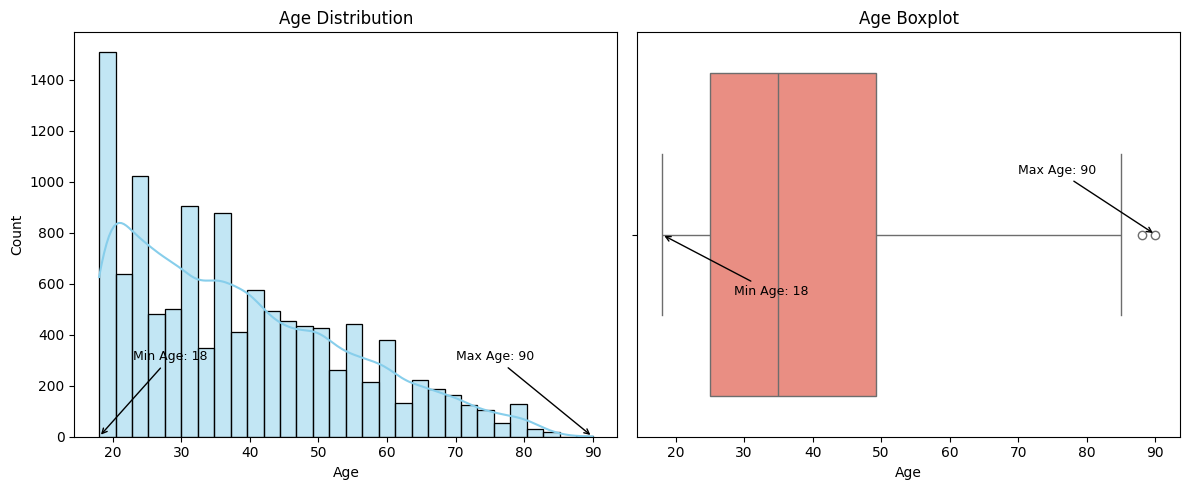

In [70]:

data = data[data['age'] <= 90]

# Now rechecking the distribution of age
plt.figure(figsize=(12, 5))

min_age = data['age'].min()
max_age = data['age'].max()

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Annotate min and max on histogram 
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 5, 300),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, 300),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'], color='salmon')
plt.title('Age Boxplot')
plt.xlabel('Age')

# Annotate min and max on boxplot 
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 10.5, 0.15),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, -0.15),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

plt.tight_layout()

# Now let's confirm the change
plt.show()


In [71]:
# Next column is "education"

inspect_column(data, 'education')



📌 Column: education
------------------------------
Unique values: ['yes' 'no' nan]
Value counts:
 education
yes    8720
no     2667
NaN     161
Name: count, dtype: int64
Missing values: 161

Normalized unique values: ['yes' 'no' nan]
Normalized value counts:
 education
yes    8720
no     2667
NaN     161
Name: count, dtype: int64


In [72]:
# Quite some missing values in the "education" column. I'll drop the rows with missing values in this column, since they are a tiny percentage of the data.
data = data.dropna(subset=['education'])

# And then confirm the change
inspect_column(data, 'education')


📌 Column: education
------------------------------
Unique values: ['yes' 'no']
Value counts:
 education
yes    8720
no     2667
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['yes' 'no']
Normalized value counts:
 education
yes    8720
no     2667
Name: count, dtype: int64


In [73]:
# Next column is "marital status"
inspect_column(data, 'marital status')


📌 Column: marital status
------------------------------
Unique values: ['yes' 'no']
Value counts:
 marital status
yes    9275
no     2112
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['yes' 'no']
Normalized value counts:
 marital status
yes    9275
no     2112
Name: count, dtype: int64


In [74]:
# "marital status" is fine, next is "zone"
inspect_column(data, 'zone')



📌 Column: zone
------------------------------
Unique values: ['north east' 'north west' 'north central' 'south south' 'south east'
 'south west']
Value counts:
 zone
north west       2595
north east       2177
north central    1860
south west       1796
south south      1558
south east       1401
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['north east' 'north west' 'north central' 'south south' 'south east'
 'south west']
Normalized value counts:
 zone
north west       2595
north east       2177
north central    1860
south west       1796
south south      1558
south east       1401
Name: count, dtype: int64


In [75]:
# "zone" is good. we have all 6 geopolitical zones represented, with no missing values. next column is "sector"
inspect_column(data, 'sector')


📌 Column: sector
------------------------------
Unique values: ['rural' 'urban']
Value counts:
 sector
rural    7435
urban    3952
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['rural' 'urban']
Normalized value counts:
 sector
rural    7435
urban    3952
Name: count, dtype: int64


In [76]:
# "sector" is good, next is "bank_account"
inspect_column(data, 'bank_account')


📌 Column: bank_account
------------------------------
Unique values: ['no' 'yes']
Value counts:
 bank_account
no     6429
yes    4958
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['no' 'yes']
Normalized value counts:
 bank_account
no     6429
yes    4958
Name: count, dtype: int64


In [77]:
# "bank_account" is good. Next is "insurance"
inspect_column(data, 'insurance')



📌 Column: insurance
------------------------------
Unique values: ['no' 'yes']
Value counts:
 insurance
no     10849
yes      538
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['no' 'yes']
Normalized value counts:
 insurance
no     10849
yes      538
Name: count, dtype: int64


In [78]:
# "insurance" is good. Next is "owned_non_agric_business"
inspect_column(data, 'owned_non_agric_business')



📌 Column: owned_non_agric_business
------------------------------
Unique values: ['no' 'yes' nan]
Value counts:
 owned_non_agric_business
no     9274
yes    2019
NaN      94
Name: count, dtype: int64
Missing values: 94

Normalized unique values: ['no' 'yes' nan]
Normalized value counts:
 owned_non_agric_business
no     9274
yes    2019
NaN      94
Name: count, dtype: int64


In [79]:
# Not much missing values in "owned_non_agric_business", so I will drop them.
data = data[~data['owned_non_agric_business'].isna()]

# And then confirm the change
inspect_column(data, 'owned_non_agric_business')



📌 Column: owned_non_agric_business
------------------------------
Unique values: ['no' 'yes']
Value counts:
 owned_non_agric_business
no     9274
yes    2019
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['no' 'yes']
Normalized value counts:
 owned_non_agric_business
no     9274
yes    2019
Name: count, dtype: int64


In [80]:
# Next column is "owned_trading_business"
inspect_column(data, 'owned_trading_business')


📌 Column: owned_trading_business
------------------------------
Unique values: ['no' 'yes']
Value counts:
 owned_trading_business
no     8869
yes    2424
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['no' 'yes']
Normalized value counts:
 owned_trading_business
no     8869
yes    2424
Name: count, dtype: int64


In [81]:
# The column is fine. Next is "purchased_crop_seed"
inspect_column(data, 'purchased_crop_seed')


📌 Column: purchased_crop_seed
------------------------------
Unique values: ['no' 'yes' nan]
Value counts:
 purchased_crop_seed
no     5551
NaN    3605
yes    2137
Name: count, dtype: int64
Missing values: 3605

Normalized unique values: ['no' 'yes' nan]
Normalized value counts:
 purchased_crop_seed
no     5551
NaN    3605
yes    2137
Name: count, dtype: int64


In [82]:
# This column seems to have a considerable amount of missing values (over 30%). I'll impute that with the value "unknown"
data['purchased_crop_seed'] = data['purchased_crop_seed'].fillna('unknown')

# Now confirming the change
inspect_column(data, 'purchased_crop_seed')


📌 Column: purchased_crop_seed
------------------------------
Unique values: ['no' 'yes' 'unknown']
Value counts:
 purchased_crop_seed
no         5551
unknown    3605
yes        2137
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['no' 'yes' 'unknown']
Normalized value counts:
 purchased_crop_seed
no         5551
unknown    3605
yes        2137
Name: count, dtype: int64


In [83]:
# Next is "price_paid_for_crop_seed"
data["price_paid_for_crop_seed"].describe()


count      7688.000000
mean       1452.736212
std        6901.328478
min           0.000000
25%           0.000000
50%           0.000000
75%         600.000000
max      240000.000000
Name: price_paid_for_crop_seed, dtype: float64

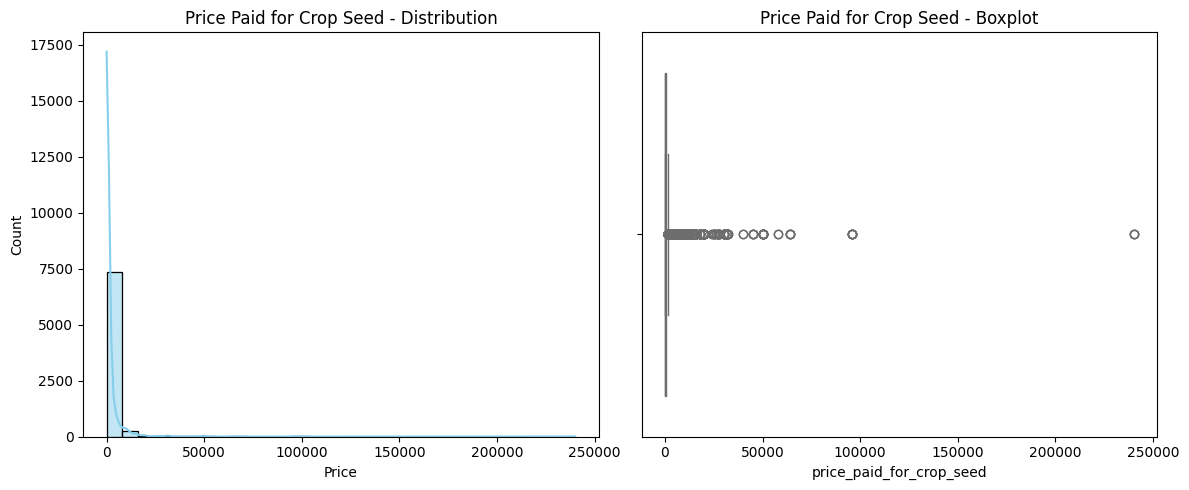

In [84]:
# This column has heavily skewded data, with lots of missing values, a huge std, and virtually nothing within the 75th percentile. Checking viz for the distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['price_paid_for_crop_seed'], bins=30, kde=True, color='skyblue')
plt.title('Price Paid for Crop Seed - Distribution')
plt.xlabel('Price')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['price_paid_for_crop_seed'], color='salmon')
plt.title('Price Paid for Crop Seed - Boxplot')

plt.tight_layout()
plt.show()


In [85]:
# I will try to impute the missing values with the median value of the column, and see if that works. I chose the median so that the missing values can be filled out without skewing the data in another direction.
# If that doesn't work, we will exclude this column

median_price = data['price_paid_for_crop_seed'].median()
data['price_paid_for_crop_seed'] = data['price_paid_for_crop_seed'].fillna(median_price)


In [86]:
data["price_paid_for_crop_seed"].describe()


count     11293.000000
mean        988.987514
std        5734.243530
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      240000.000000
Name: price_paid_for_crop_seed, dtype: float64

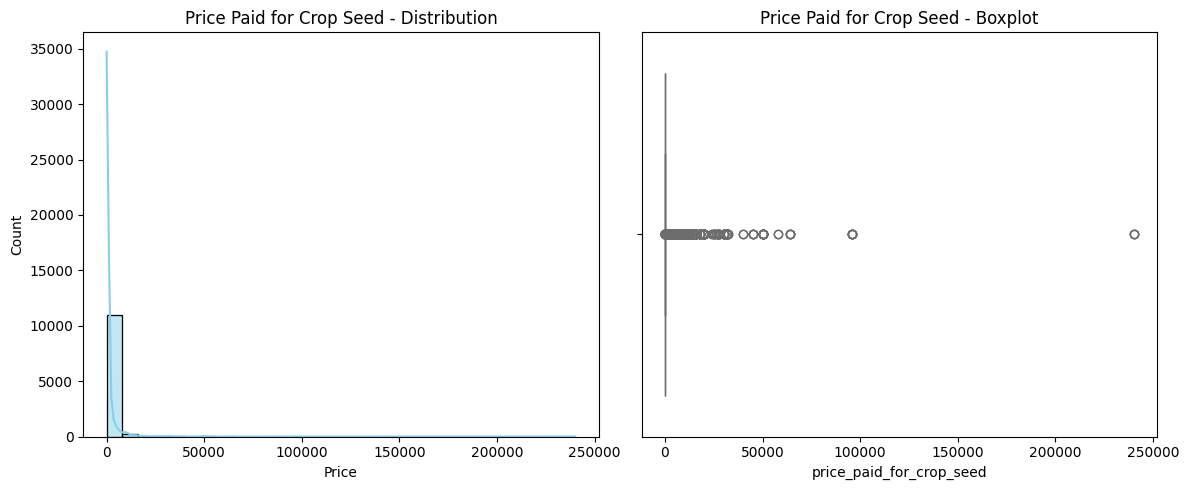

In [87]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['price_paid_for_crop_seed'], bins=30, kde=True, color='skyblue')
plt.title('Price Paid for Crop Seed - Distribution')
plt.xlabel('Price')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['price_paid_for_crop_seed'], color='salmon')
plt.title('Price Paid for Crop Seed - Boxplot')

plt.tight_layout()
plt.show()

In [88]:
# That didn't work, we need more information about that column. For now, we drop it and move to the nnext column

inspect_column(data, 'financed_purchase_cropseed')



📌 Column: financed_purchase_cropseed
------------------------------
Unique values: [nan 'yes' 'no']
Value counts:
 financed_purchase_cropseed
NaN    9156
no     1313
yes     824
Name: count, dtype: int64
Missing values: 9156

Normalized unique values: [nan 'yes' 'no']
Normalized value counts:
 financed_purchase_cropseed
NaN    9156
no     1313
yes     824
Name: count, dtype: int64


In [89]:
# Plenty of missing values in this one. I will impute with "unknown"
data['financed_purchase_cropseed'] = data['financed_purchase_cropseed'].fillna('unknown')

# And confirm the change
inspect_column(data, 'financed_purchase_cropseed')



📌 Column: financed_purchase_cropseed
------------------------------
Unique values: ['unknown' 'yes' 'no']
Value counts:
 financed_purchase_cropseed
unknown    9156
no         1313
yes         824
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['unknown' 'yes' 'no']
Normalized value counts:
 financed_purchase_cropseed
unknown    9156
no         1313
yes         824
Name: count, dtype: int64


In [90]:
# Next column is "planted_crop(quantity)"
data['planted_crop(quantity)'].describe()


count      7657.000000
mean        777.517304
std       18710.578640
min           0.500000
25%           3.000000
50%           5.000000
75%          15.000000
max      700000.000000
Name: planted_crop(quantity), dtype: float64

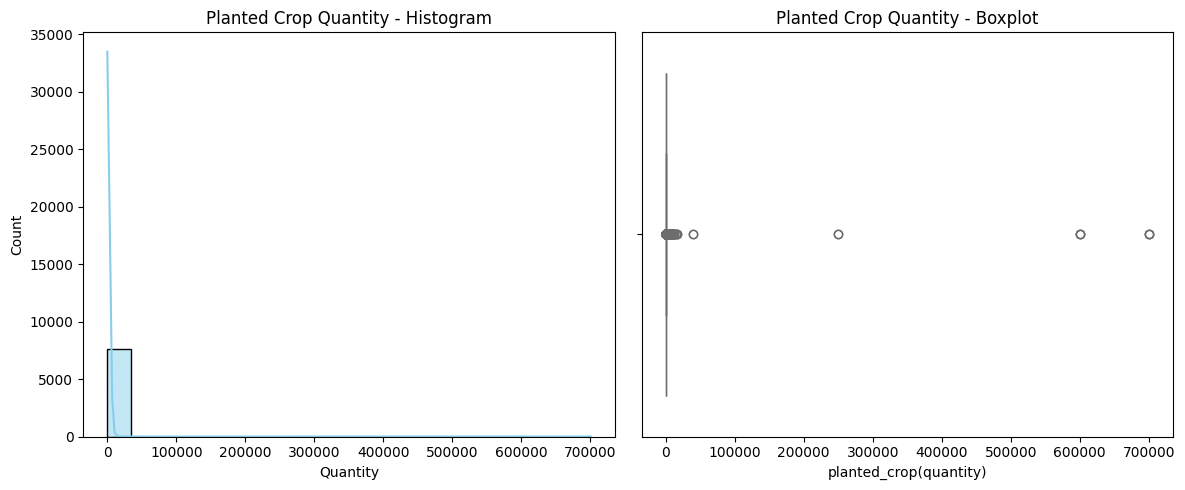

In [91]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['planted_crop(quantity)'], bins=20, kde=True, color='skyblue')
plt.title('Planted Crop Quantity - Histogram')
plt.xlabel('Quantity')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['planted_crop(quantity)'], color='salmon')
plt.title('Planted Crop Quantity - Boxplot')

plt.tight_layout()
plt.show()


In [92]:
# This looks like another column with impossible data. We will omit it and move on. Next column is "'planted_crop(unit)"
data['planted_crop(unit)'].describe()


count    7657.000000
mean       72.971921
std        65.050421
min         1.000000
25%        30.000000
50%        50.000000
75%       100.000000
max       900.000000
Name: planted_crop(unit), dtype: float64

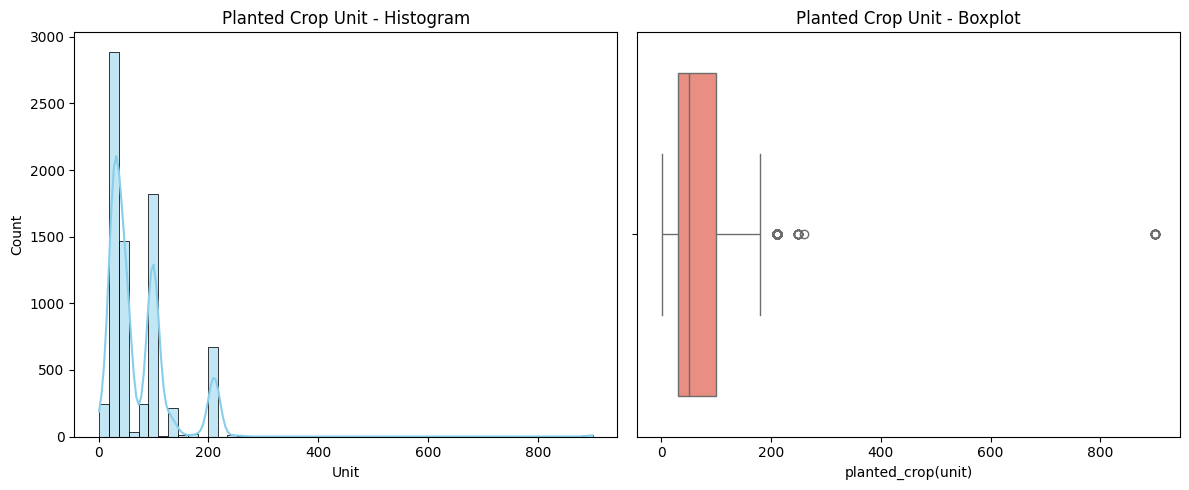

In [93]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['planted_crop(unit)'], bins=50, kde=True, color='skyblue')
plt.title('Planted Crop Unit - Histogram')
plt.xlabel('Unit')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['planted_crop(unit)'], color='salmon')
plt.title('Planted Crop Unit - Boxplot')

plt.tight_layout()
plt.show()


In [94]:
print(data['planted_crop(unit)'].median(), data['planted_crop(unit)'].mean())

50.0 72.9719211179313


count    11293.000000
mean        65.575666
std         54.627984
min          1.000000
25%         30.000000
50%         50.000000
75%         90.000000
max        900.000000
Name: planted_crop(unit), dtype: float64

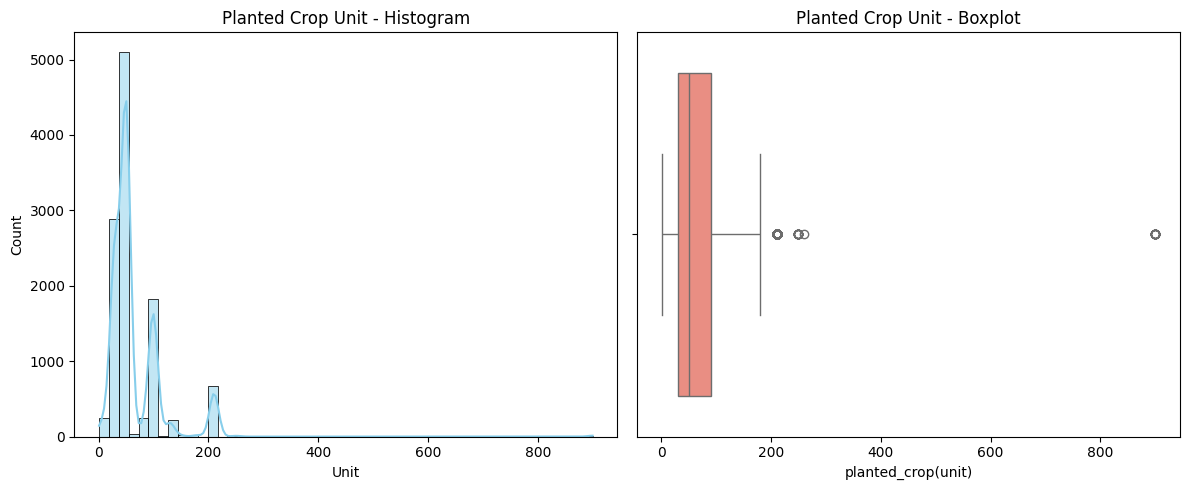

In [95]:
# This is another heavily skewed column. Since this column carries information about the number of units of crop planted by each farmer, I will try to impute with the median value and see if it doesn't influence the data too mucch
median_unit = data['planted_crop(unit)'].median()
data['planted_crop(unit)'] = data['planted_crop(unit)'].fillna(median_unit)
display(data['planted_crop(unit)'].describe())

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['planted_crop(unit)'], bins=50, kde=True, color='skyblue')
plt.title('Planted Crop Unit - Histogram')
plt.xlabel('Unit')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['planted_crop(unit)'], color='salmon')
plt.title('Planted Crop Unit - Boxplot')

plt.tight_layout()
plt.show()



In [96]:
# It's not perfect, but we can salvage it. Next column is "harvested_crop(quantity)"
data['harvested_crop(quantity)'].describe()


count    7640.00000
mean       42.72373
std       354.13419
min         0.00000
25%         0.00000
50%         4.00000
75%        10.00000
max      8000.00000
Name: harvested_crop(quantity), dtype: float64

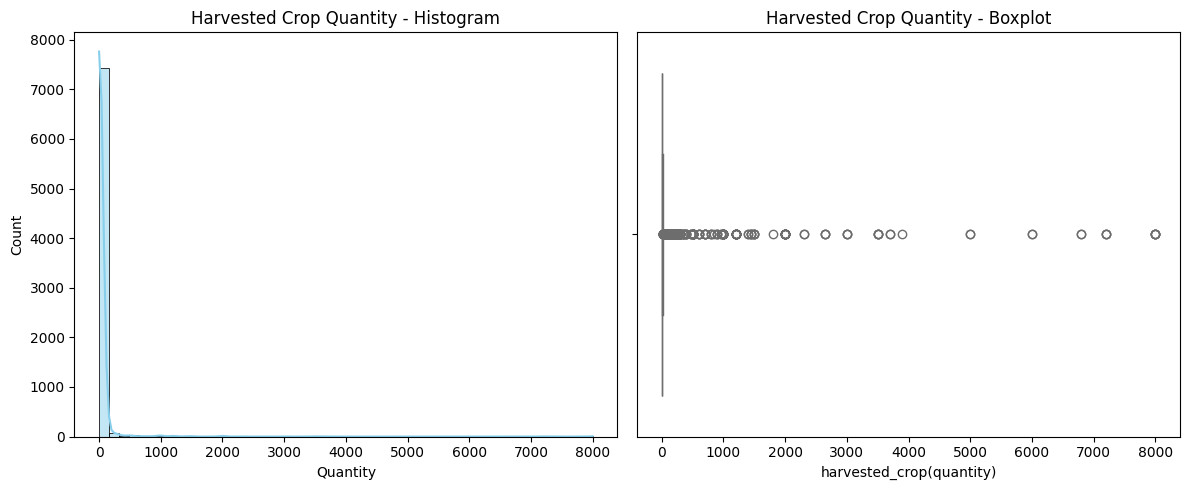

In [97]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['harvested_crop(quantity)'], bins=50, kde=True, color='skyblue')
plt.title('Harvested Crop Quantity - Histogram')
plt.xlabel('Quantity')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['harvested_crop(quantity)'], color='salmon')
plt.title('Harvested Crop Quantity - Boxplot')

plt.tight_layout()
plt.show()


count    7640.00000
mean       42.72373
std       354.13419
min         0.00000
25%         0.00000
50%         4.00000
75%        10.00000
max      8000.00000
Name: harvested_crop(quantity), dtype: float64

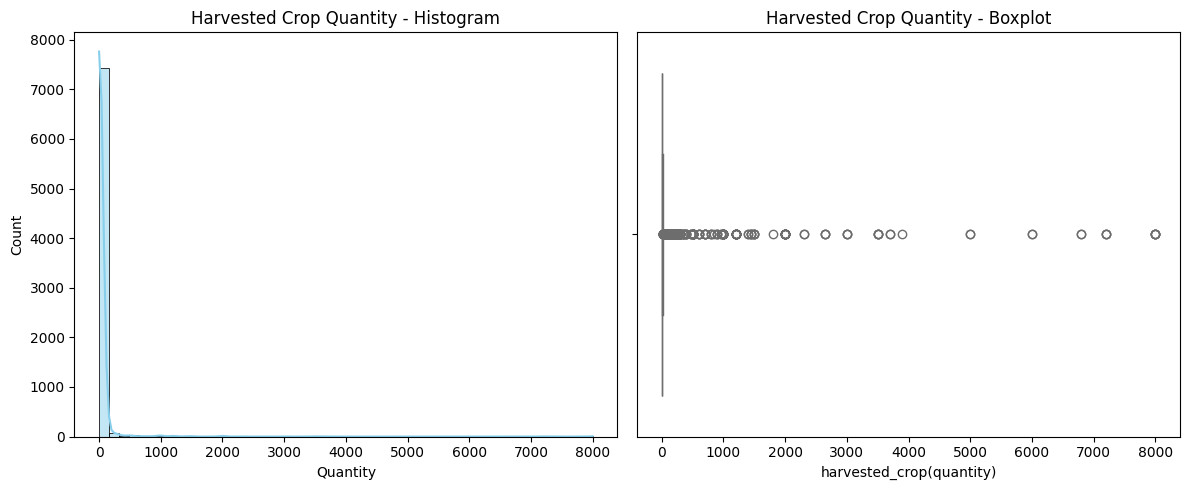

In [98]:
# Impute missing harvested crop quantities with median
median_harvested_unit = data['harvested_crop(unit)'].median()
data['harvested_crop(unit)'] = data['harvested_crop(unit)'].fillna(median_harvested_unit)


display(data['harvested_crop(quantity)'].describe())

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['harvested_crop(quantity)'], bins=50, kde=True, color='skyblue')
plt.title('Harvested Crop Quantity - Histogram')
plt.xlabel('Quantity')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['harvested_crop(quantity)'], color='salmon')
plt.title('Harvested Crop Quantity - Boxplot')

plt.tight_layout()
plt.show()



In [99]:
# Next is "harvested_crop(unit)"
data['harvested_crop(unit)'].describe()


count    11293.000000
mean       106.251749
std         52.760387
min          0.000000
25%        130.000000
50%        130.000000
75%        130.000000
max        211.000000
Name: harvested_crop(unit), dtype: float64

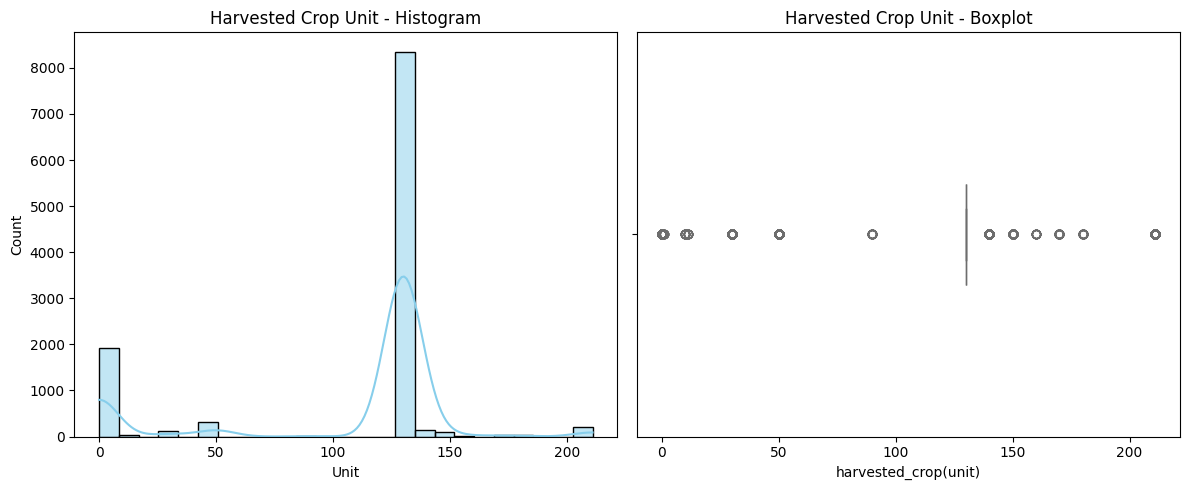

In [100]:
plt.figure(figsize=(12, 5))

# Histogram with fewer bins
plt.subplot(1, 2, 1)
sns.histplot(data['harvested_crop(unit)'], bins=25, kde=True, color='skyblue')
plt.title('Harvested Crop Unit - Histogram')
plt.xlabel('Unit')

# Boxplot with smaller width
plt.subplot(1, 2, 2)
sns.boxplot(x=data['harvested_crop(unit)'], color='salmon', width=0.25)
plt.title('Harvested Crop Unit - Boxplot')

plt.tight_layout()
plt.show()


count    11293.000000
mean       106.251749
std         52.760387
min          0.000000
25%        130.000000
50%        130.000000
75%        130.000000
max        211.000000
Name: harvested_crop(unit), dtype: float64

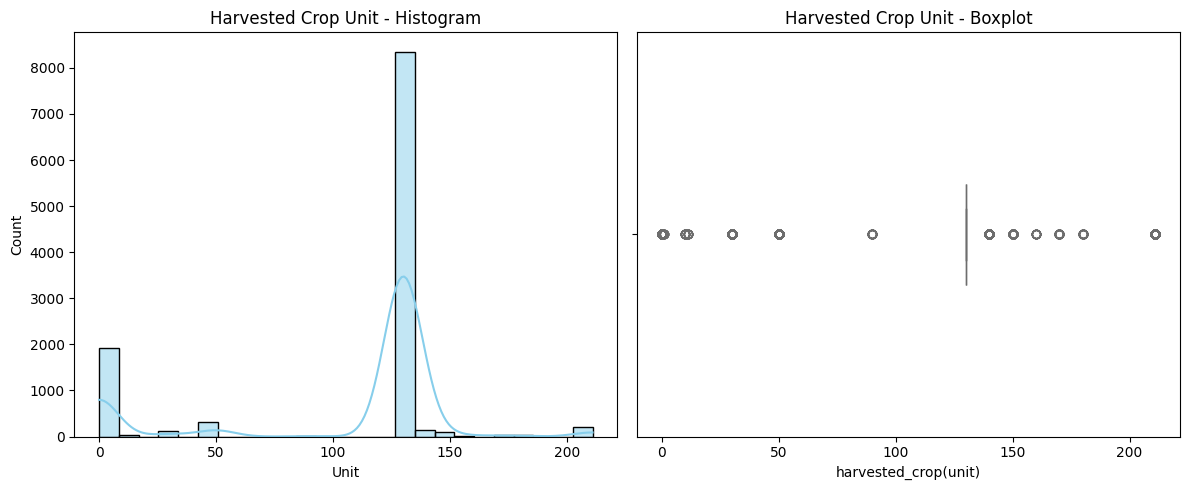

In [101]:
# Imputing with median
median_harvested_unit = data['harvested_crop(unit)'].median()
data['harvested_crop(unit)'] = data['harvested_crop(unit)'].fillna(median_harvested_unit)


display(data['harvested_crop(unit)'].describe())

plt.figure(figsize=(12, 5))

# Histogram with fewer bins
plt.subplot(1, 2, 1)
sns.histplot(data['harvested_crop(unit)'], bins=25, kde=True, color='skyblue')
plt.title('Harvested Crop Unit - Histogram')
plt.xlabel('Unit')

# Boxplot with smaller width
plt.subplot(1, 2, 2)
sns.boxplot(x=data['harvested_crop(unit)'], color='salmon', width=0.25)
plt.title('Harvested Crop Unit - Boxplot')

plt.tight_layout()
plt.show()


In [102]:
# Next is "harvested_crop_sold"

data['harvested_crop_sold'].describe()

count    7369.000000
mean        9.593154
std        72.241025
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      2000.000000
Name: harvested_crop_sold, dtype: float64

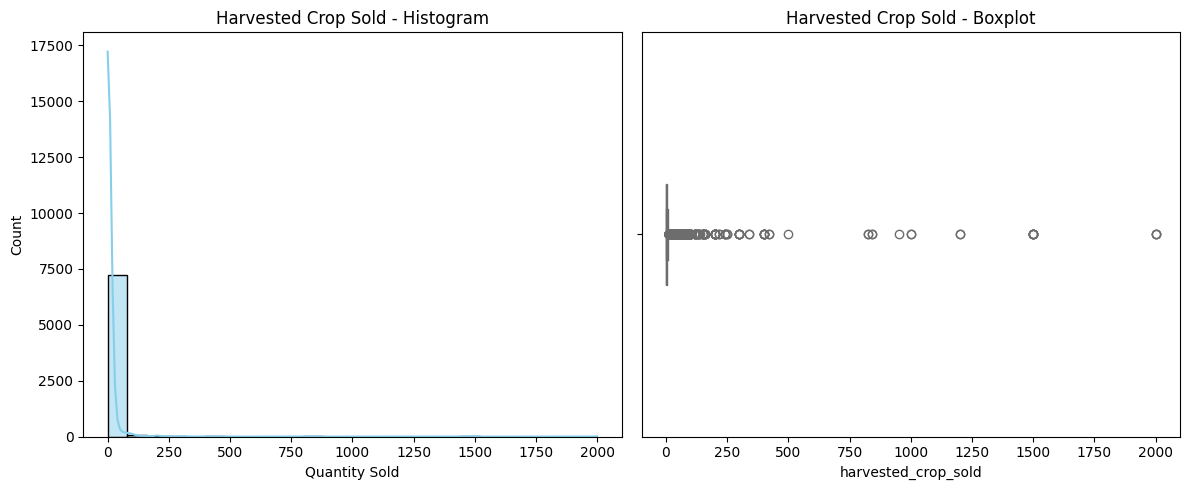

In [103]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['harvested_crop_sold'], bins=25, kde=True, color='skyblue')
plt.title('Harvested Crop Sold - Histogram')
plt.xlabel('Quantity Sold')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['harvested_crop_sold'], color='salmon', width=0.25)
plt.title('Harvested Crop Sold - Boxplot')

plt.tight_layout()
plt.show()


count    11293.000000
mean         6.259803
std         58.532886
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       2000.000000
Name: harvested_crop_sold, dtype: float64

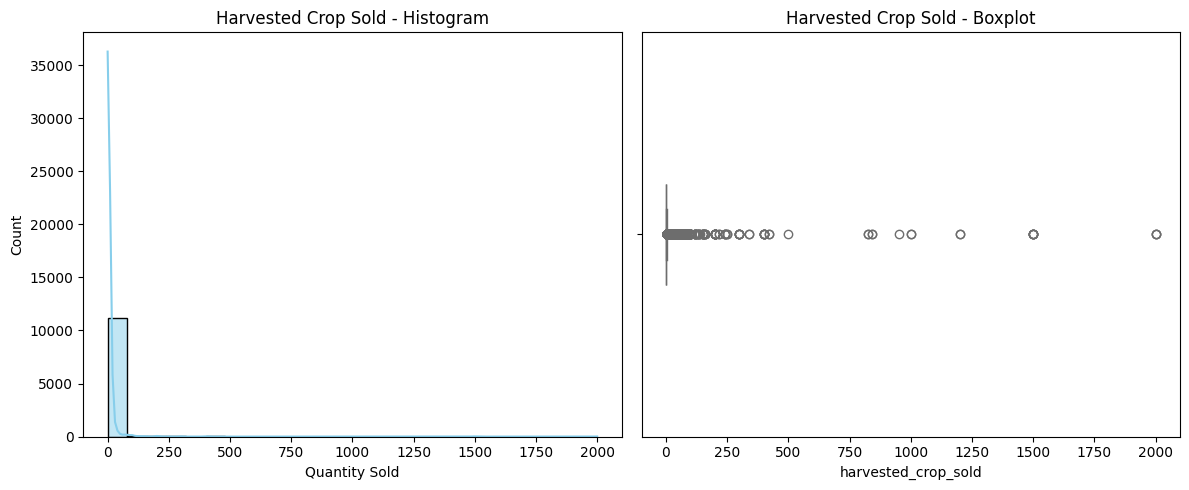

In [104]:
median_harvested_sold = data['harvested_crop_sold'].median()
data['harvested_crop_sold'] = data['harvested_crop_sold'].fillna(median_harvested_sold)

display(data['harvested_crop_sold'].describe()) 

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['harvested_crop_sold'], bins=25, kde=True, color='skyblue')
plt.title('Harvested Crop Sold - Histogram')
plt.xlabel('Quantity Sold')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['harvested_crop_sold'], color='salmon', width=0.25)
plt.title('Harvested Crop Sold - Boxplot')

plt.tight_layout()
plt.show()



### Now we do the ML prediction part.

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# List of columns to be used for the model
selected_columns = [
    'gender', 'age', 'education', 'marital status', 'zone', 'sector', 
    'bank_account', 'insurance', 'owned_non_agric_business', 
    'owned_trading_business', 'purchased_crop_seed', 
    'financed_purchase_cropseed', 'planted_crop(unit)', 
    'harvested_crop(quantity)', 'harvested_crop(unit)'
]

# Categorical and numerical feature lists
cat_features = [
    'gender', 'education', 'marital status', 'zone', 'sector', 
    'bank_account', 'insurance', 'owned_non_agric_business', 
    'owned_trading_business', 'purchased_crop_seed', 'financed_purchase_cropseed'
]

num_features = [
    'age', 'planted_crop(unit)', 'harvested_crop(quantity)', 'harvested_crop(unit)'
]

# Preprocessing: scale numericals, one-hot encode categoricals
preprocessed_columns = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# Define the classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Pipeline: preprocessing + classifier
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessed_columns),
    ('xgboost', xgb)
])

# Grid search parameters
search_xgb_grid = {
    'xgboost__n_estimators': [50, 100, 200],
    'xgboost__max_depth': [3, 5, 7],
    'xgboost__learning_rate': [0.01, 0.1, 0.2]
}

# Dataset split: define X and y
X = data[selected_columns]
# Encode the target variable
y = data['borrowed/loan'].map({'no': 0, 'yes': 1})

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Grid search for hyperparameter tuning
xgb_grid_search = GridSearchCV(xgb_pipeline, search_xgb_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:")
print(xgb_grid_search.best_params_)

print("\nBest CV Score:")
print(xgb_grid_search.best_score_)

# Evaluate on validation set
xgb_validation_score = xgb_grid_search.score(X_valid, y_valid)
print("\nValidation Accuracy:")
print(xgb_validation_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:38:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:
{'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 7, 'xgboost__n_estimators': 200}

Best CV Score:
0.8601950333420971

Validation Accuracy:
0.8636564851704294


In [106]:
# Make predictions on validation data
y_pred_binary = xgb_grid_search.predict(X_valid)

# Convert back to 'yes'/'no'
y_pred_labels = ['yes' if pred == 1 else 'no' for pred in y_pred_binary]

print("\nPredictions (yes/no):")
display(y_pred_labels[:20])  # print first 20 for preview



Predictions (yes/no):


['no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no']

### Evaluating the model

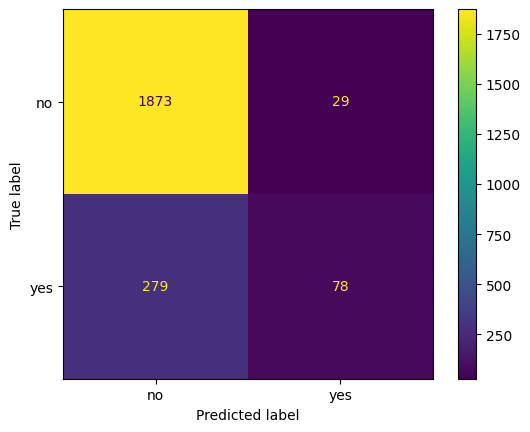

In [107]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert y_valid from 0/1 to 'no'/'yes'
y_valid_labels = ['yes' if val == 1 else 'no' for val in y_valid]

# Generate the confusion matrix
cm = confusion_matrix(y_valid_labels, y_pred_labels, labels=['no', 'yes'])

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot()


**Here's the interpretation of the matrix:**

True Negatives (top-left): 1873 instances where the model correctly predicted "no"

False Positives (top-right): 29 instances where the model incorrectly predicted "yes" when the true label was "no"

False Negatives (bottom-left): 279 instances where the model incorrectly predicted "no" when the true label was "yes"

True Positives (bottom-right): 78 instances where the model correctly predicted "yes"

---

From these values, we can calculate some performance metrics:

**Accuracy: (1873 + 78) / (1873 + 29 + 279 + 78) = 85.6%**

**Precision: 78 / (78 + 29) = 72.9%**

**Recall: 78 / (78 + 279) = 21.8%**

**F1 Score: 2 x (Precision x Recall) / (Precision + Recall) = 33.6%**

---

## Limitations:
**The model appears to be good at identifying negative cases but struggles with identifying positive cases (low recall), suggesting it might be biased toward predicting "no". However, this can be largely improved by having a more structured data (we had to do a lot of imputation during preprocessing due to lots of missing data. If we have a better data source, we will improve model performance).**




#### Other steps: Experimental model deployment (in no particular order).

In [ ]:
import joblib

# Save the model to the specified path (local)

model_path = r'C:\Users\USER\Desktop\Models\loan_model.pkl'
joblib.dump(xgb_grid_search, model_path)


['C:\\Users\\USER\\Desktop\\Models\\loan_model.pkl']

In [ ]:
# Saving the Flask code in a separate Python file

from flask import Flask, request, jsonify
import pandas as pd
import joblib

# Load the model
model = joblib.load('loan_model.pkl')

# Set up the app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Convert input to DataFrame
    input_df = pd.DataFrame([data])

    # Make prediction (binary 0/1)
    pred_binary = model.predict(input_df)[0]

    # Convert to yes/no
    pred_label = 'yes' if pred_binary == 1 else 'no'

    return jsonify({'prediction': pred_label})

if __name__ == '__main__':
    app.run(debug=True)


# Terminal commands to run the Flask app

# Working directory (local)
pwd

# Run the Flask app
python loan_model.py

# In a separate terminal, use curl to test the API
curl -X POST http://127.0.0.1:5000/predict ^
-H "Content-Type: application/json" ^
-d "{\"gender\": \"female\", \"age\": 32, \"education\": \"primary\", \"marital status\": \"married\", \"zone\": \"north\", \"sector\": \"agriculture\", \"bank_account\": \"yes\", \"insurance\": \"no\", \"owned_non_agric_business\": \"no\", \"owned_trading_business\": \"yes\", \"purchased_crop_seed\": \"yes\", \"financed_purchase_cropseed\": \"no\", \"planted_crop(unit)\": 4, \"harvested_crop(quantity)\": 120, \"harvested_crop(unit)\": \"kg\"}"

# The above command sends a POST request to the Flask app with a sample input JSON. The app should respond with a JSON object containing the prediction.

### Flask turns the JSON into a DataFrame, makes a prediction, converts the result to 'yes' or 'no', and returns it.
